# Footballers' market value prediction

In [26]:
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import re
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#pip install pyautogui

from selenium.webdriver.common.by import By
from time import sleep
import pyautogui
import pandas as pd
from tqdm.notebook import tqdm

from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

import warnings 
warnings.filterwarnings('ignore')

# **1) WEB SCRAPING**

In [4]:
#Table nr 1

player_name, player_age, player_nationality = list(), list(), list()
player_club, player_value, player_matches = list(), list(), list()
player_goals, player_own_goals, player_assists = list(), list(), list()
player_yellow_cards, player_2_yellow_cards, player_red_cards = list(), list(), list()
player_comes_from_bench, player_benched = list(), list()
player_country_association, player_position = list(), list()

service = Service("geckodriver.exe")

options = Options()


### below change the directory for yours
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Firefox(service=service, options=options)

for x in tqdm(range(1,7)):
    for y in tqdm(range(1, 21), leave=False):
        driver.get(f"https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?kontinent_id={x}&plus=1&page={y}")
        if (x == y == 1):
            driver.maximize_window()
            sleep(3)
            pyautogui.click(x=1110, y=747)
            driver.minimize_window()

        XPATH_help = driver.find_elements(By.XPATH, '//td[@class="zentriert"]')
        age =                           list(map(lambda x: x.text, XPATH_help[1::13]))
        matches =                       list(map(lambda x: x.text, XPATH_help[4::13]))
        goals =                         list(map(lambda x: x.text, XPATH_help[5::13]))
        own_goals =                     list(map(lambda x: x.text, XPATH_help[6::13]))
        asysty =                        list(map(lambda x: x.text, XPATH_help[7::13]))
        yellow_cards =                  list(map(lambda x: x.text, XPATH_help[8::13]))
        two_yellow_cards_in_one_match = list(map(lambda x: x.text, XPATH_help[9::13]))
        red_cards =                     list(map(lambda x: x.text, XPATH_help[10::13]))
        come_from_bench =               list(map(lambda x: x.text, XPATH_help[11::13]))
        from_pitch_to_bench =           list(map(lambda x: x.text, XPATH_help[12::13]))
          
        clubs = driver.find_elements(By.XPATH, '//img[@class=""]')
        clubs = list(map(lambda x: x.get_attribute("title"), clubs))
        countries = driver.find_elements(By.XPATH, '//td[@class="zentriert"]/following::img[@class="flaggenrahmen"][1]')
        countries = list(map(lambda x: x.get_attribute("title"), countries))
        position = driver.find_elements(By.XPATH, '//td[@class="hauptlink"]/following::tr[1]')
        position = list(map(lambda x: x.text, position))
        value = driver.find_elements(By.XPATH, '//td[@class="rechts hauptlink"]')
        value = list(map(lambda x: x.text, value))
        name = driver.find_elements(By.XPATH, '//td[@class="hauptlink"]')
        name = list(map(lambda x: x.text, name))

        player_name.extend(name)
        player_age.extend(age)
        player_nationality.extend(countries)
        player_club.extend(clubs)
        player_value.extend(value) 
        player_matches.extend(matches) 
        player_goals.extend(goals) 
        player_own_goals.extend(own_goals)
        player_assists.extend(asysty) 
        player_yellow_cards.extend(yellow_cards) 
        player_2_yellow_cards.extend(two_yellow_cards_in_one_match)
        player_red_cards.extend(red_cards)
        player_comes_from_bench.extend(come_from_bench)
        player_benched.extend(from_pitch_to_bench)
        player_position.extend(position)
    player_country_association.extend([x]*25*20)

driver.quit()


df = pd.DataFrame()

df["name"] = player_name 
df["age" ] = player_age 
df["nationality"] = player_nationality
df["club"] = player_club 
df["position"] = player_position
df["value_in_millions_of_euros"] = list(map(lambda x: x.translate(str.maketrans({"€":"", "m":"", " ":""})), player_value))
df["matches"] = player_matches
df["goals"] = player_goals 
df["own goals"] = player_own_goals 
df["assists"] = player_assists
df["yellow_cards"] = player_yellow_cards 
df["2_yellow_cards_in_1_match"] = player_2_yellow_cards 
df["red_cards"] = player_red_cards
df["matches_when_player_came_from_bench"] = player_comes_from_bench 
df["matches_when_player_played_but_then_left_the_pitch"] = player_benched
df["country_association"] = player_country_association

df.to_csv("transfermarkt.csv")

In [16]:
#Table nr 2

# We take names of clubs from many leagues: English, French, Italian, German, Spanish, Portuguese, American, Saudi
# Arabian, Japanese, Dutch

service = Service("geckodriver.exe")

options = Options()

### below change the directory for yours
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Firefox(service=service, options=options)

list_teams, list_league_name = list(), list()

leagues = ["GB1", "GB2", "NL1", "NL2", "PO1", "PO2", "FR1", "L1", "L2", "IT1", "IT2", "ES1", 
           "ES2", "MLS1", "CSL", "JAP1", "SA1"]

for x in tqdm(leagues):
    driver.get(f"https://www.transfermarkt.com/super-lig/torschuetzenverteilung/wettbewerb/{x}")
    if x == leagues[0]:
        driver.maximize_window()
        sleep(2)
        pyautogui.click(x=1110, y=747)
        driver.minimize_window()

    teams = driver.find_elements(By.XPATH, '//td[@class="hauptlink no-border-links"]')
    teams = list(map(lambda x: x.text, teams))
    list_teams.extend(teams)
    list_league_name.extend([driver.find_element(By.XPATH, '//img[@class=""]').get_attribute("title")]*len(teams))
    
driver.quit()

df_league = pd.DataFrame()

df_league["league"] = list_league_name
df_league["club"] = list_teams

df_league.to_csv("club_league_merge.csv")

In [35]:
#Table nr 3

# We take names of clubs which participated in Uefa Champions League in last season or two seasons ago.

service = Service("geckodriver.exe")

options = Options()


### below change the directory for yours
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Firefox(service=service, options=options)

list_teams_UCL = list()

for x in tqdm(["2021", "2022"]):
    driver.get(f"https://www.transfermarkt.com/uefa-champions-league/startseite/pokalwettbewerb/CL?saison_id={x}")
    if x == "2021":
        driver.maximize_window()
        sleep(1)
        pyautogui.click(x=1110, y=747)
        driver.minimize_window()

    teams = driver.find_elements(By.XPATH, '//td[@class="no-border-links hauptlink"]/a')
    teams = list(map(lambda x: x.get_attribute("title"), teams))

    list_teams_UCL.extend(teams)

driver.quit()

list_teams_UCL = np.unique(list_teams_UCL).tolist()
list_teams_UCL = list(filter(lambda x: x != "", list_teams_UCL))

df_CL = pd.DataFrame()
df_CL["club"] = list_teams_UCL

df_CL["club_was_in_last_2_seasons_in_UCL"] = 1

df_CL.to_csv("club_UCL_merge.csv")

# 2) Data engineering part

In [61]:
df = pd.read_csv("transfermarkt.csv", index_col=0)
df_CL = pd.read_csv("club_UCL_merge.csv", index_col=0)
df_league = pd.read_csv("club_league_merge.csv", index_col=0)

# Joining all tables together
df = pd.merge(df, df_CL, how="left", on="club")
df = pd.merge(df, df_league, how="left", on="club")

df = df[df['age'] != "-"]
df["age"] = df["age"].astype(int)

df["club_was_in_last_2_seasons_in_UCL"].fillna(0, inplace=True)

df["league"].fillna("Other league", inplace=True)

df["club_was_in_last_2_seasons_in_UCL"] = df["club_was_in_last_2_seasons_in_UCL"].astype(int)

df["value_in_millions_of_euros"] = df["value_in_millions_of_euros"].apply(lambda x: float(x[:-1])/1000 if x.endswith("k") else float(x))

from_ = [1,2,3,4,5,6]
to_ = ["AFC", "CAF", "CONCACAF", "CONMEBOL", "OFC", "UEFA"]

df["country_association"].replace(dict(zip(from_, to_)), inplace=True)

df.reset_index(drop=True, inplace=True)

df.to_csv("transfermarkt_main_file.csv")

In [401]:
data_player = pd.read_csv("transfermarkt_main_file.csv", index_col=0)

In [402]:
data_player.head()

,name,age,nationality,club,position,value_in_millions_of_euros,matches,goals,own goals,assists,yellow_cards,2_yellow_cards_in_1_match,red_cards,matches_when_player_came_from_bench,matches_when_player_played_but_then_left_the_pitch,country_association,club_was_in_last_2_seasons_in_UCL,league
0,Heung-min Son,30,"Korea, South",Tottenham Hotspur,Left Winger,60.0,50,18,0,5,3,0,0,3,19,AFC,1,Premier League
1,Min-jae Kim,26,"Korea, South",SSC Napoli,Centre-Back,50.0,48,2,0,2,8,0,0,1,5,AFC,1,Serie A
2,Daichi Kamada,26,Japan,Eintracht Frankfurt,Attacking Midfield,30.0,48,16,0,7,4,0,0,9,17,AFC,1,Bundesliga
3,Takehiro Tomiyasu,24,Japan,Arsenal FC,Right-Back,25.0,32,0,0,2,2,0,0,18,9,AFC,0,Premier League
4,Kaoru Mitoma,26,Japan,Brighton & Hove Albion,Left Winger,22.0,42,11,0,8,1,0,0,10,13,AFC,0,Premier League


In [403]:
data_player.shape

(2952, 18)

In [404]:
data_player.isna().sum()

name                                                  0
age                                                   0
nationality                                           0
club                                                  0
position                                              0
value_in_millions_of_euros                            0
matches                                               0
goals                                                 0
own goals                                             0
assists                                               0
yellow_cards                                          0
2_yellow_cards_in_1_match                             0
red_cards                                             0
matches_when_player_came_from_bench                   0
matches_when_player_played_but_then_left_the_pitch    0
country_association                                   0
club_was_in_last_2_seasons_in_UCL                     0
league                                          

In [406]:
# cleaning position variable
data_player["position"].value_counts()

Centre-Back           477
Centre-Forward        423
Central Midfield      360
Defensive Midfield    257
Left Winger           249
Attacking Midfield    237
Right Winger          228
Left-Back             194
Right-Back            193
Goalkeeper            155
midfield               49
Left Midfield          36
Defender               36
Attack                 22
Right Midfield         20
Second Striker         16
Name: position, dtype: int64

In [407]:
data_player["position"] = np.select([data_player.position == "midfield", 
                                     data_player.position == "Attack", 
                                     data_player.position == "Defender"],
                           ["Central Midfield", "Centre-Forward", "Centre-Back"], data_player.position)


data_player["position"] = np.select([data_player.position == "Left Midfield", 
                                     data_player.position == "Right Midfield", 
                                     data_player.position == "Second Striker"],
                           ["Left Winger", "Right Winger", "Centre-Forward"], data_player.position)

In [409]:
data_player["position"].value_counts()

Centre-Back           513
Centre-Forward        461
Central Midfield      409
Left Winger           285
Defensive Midfield    257
Right Winger          248
Attacking Midfield    237
Left-Back             194
Right-Back            193
Goalkeeper            155
Name: position, dtype: int64

In [410]:
#adding new variable - helpful in tree-based models
data_player["general_position"] = np.select([data_player.position.isin(["Centre-Back", "Right-Back", "Left-Back"]),
                                    data_player.position.isin(["Central Midfield", "Defensive Midfield", "Attacking Midfield"]),
                                    data_player.position.isin(["Centre-Forward", "Left Winger", "Right Winger"])],
                                   ["Defender", "Midfielder", "Attacker"], "Goalkeeper")

In [411]:
data_player["general_position"].value_counts()

Attacker      994
Midfielder    903
Defender      900
Goalkeeper    155
Name: general_position, dtype: int64

In [412]:
data_player["goals_per_match"] = data_player["goals"] / data_player["matches"]

In [413]:
data_player["goals_per_match"].describe()

count    2845.000000
mean        0.124758
std         0.160683
min         0.000000
25%         0.000000
50%         0.068966
75%         0.181818
max         1.333333
Name: goals_per_match, dtype: float64

In [414]:
data_player["own_goals_per_match"] = data_player["own goals"] / data_player["matches"]
data_player["assists_per_match"] = data_player["assists"] / data_player["matches"]
data_player["yellow_cards_per_match"] = data_player["yellow_cards"] / data_player["matches"]
data_player["2_yellow_cards_in_1_match_per_match"] = data_player["2_yellow_cards_in_1_match"] / data_player["matches"]	
data_player["red_cards_per_match"] = data_player["red_cards"] / data_player["matches"]
data_player["matches_when_player_came_from_bench_per_match"] = data_player["matches_when_player_came_from_bench"] / data_player["matches"]
data_player["matches_when_player_played_but_then_left_the_pitch_per_match"] = data_player["matches_when_player_played_but_then_left_the_pitch"] / data_player["matches"]

In [415]:
data_player.shape

(2952, 27)

In [416]:
data_player[data_player.isna().any(axis=1)].head()

,name,age,nationality,club,position,value_in_millions_of_euros,matches,goals,own goals,assists,...,league,general_position,goals_per_match,own_goals_per_match,assists_per_match,yellow_cards_per_match,2_yellow_cards_in_1_match_per_match,red_cards_per_match,matches_when_player_came_from_bench_per_match,matches_when_player_played_but_then_left_the_pitch_per_match
127,Hiroshi Kiyotake,33,Japan,Cerezo Osaka,Attacking Midfield,1.200,0,0,0,0,...,J1 League,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,Saad Abdul Ameer,31,Iraq,Al-Zawraa SC,Defensive Midfield,0.675,0,0,0,0,...,Other league,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,Ali Al-Asmari,26,Saudi Arabia,Al-Ahli Saudi FC,Defensive Midfield,0.650,0,0,0,0,...,Other league,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,Jérôme Onguéné,25,Cameroon,Red Bull Salzburg,Centre-Back,3.500,0,0,0,0,...,Other league,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,Mohamed Fares,27,Algeria,SS Lazio,Left Winger,3.000,0,0,0,0,...,Serie A,Attacker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
data_player.dropna(inplace=True)
data_player.shape

(2845, 27)

In [418]:
data_player.to_csv("TF.csv")

# **3) DATA VISUALISATION**

In [81]:
data_player = pd.read_csv("TF.csv", index_col=0)

In [82]:
#LEAGUE COMPARISON

Number of players by country for each position



In [83]:
positionByCountry = (
                  data_player.filter(["position","nationality"])

                  .groupby(["position","nationality"])

                  .agg(Count=("position", "count"))

                  .reset_index()

)

# Total number of players for each nationality
totalPlayersByCountry = data_player["nationality"].value_counts().reset_index().rename(columns={"index": "nationality", "nationality": "Total"})

# Merging of the 2 DataFrame (PositionByCountry and totalPlayersByCountry)
positionByCountry = positionByCountry.merge(totalPlayersByCountry, on="nationality")

# % of players for each position for each country 
positionByCountry["Proportion (in %)"] = positionByCountry["Count"]/positionByCountry["Total"]*100

# Display
positionByCountry.query("Count > 20").sort_values("Proportion (in %)", ascending=False).head(10)

,position,nationality,Count,Total,Proportion (in %)
134,Centre-Back,Fiji,36,119,30.252101
133,Central Midfield,Fiji,33,119,27.731092
368,Central Midfield,United States,35,181,19.337017
278,Central Midfield,New Zealand,40,213,18.779343
279,Centre-Back,New Zealand,39,213,18.309859
369,Centre-Back,United States,32,181,17.679558
250,Centre-Back,Mexico,32,193,16.580311
45,Centre-Back,Brazil,34,210,16.190476
221,Centre-Back,Japan,32,202,15.841584
13,Centre-Forward,Argentina,22,145,15.172414


**MARKET VALUE IN THE BIG 5**

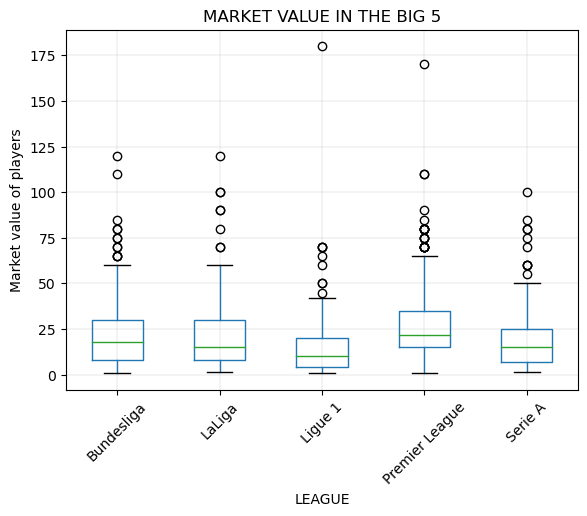

In [85]:
# We only take the big 5
selectedChampionship= data_player[data_player["league"].isin(["LaLiga", "Bundesliga", "Ligue 1", "Serie A", "Premier League"])]

fig, ax = plt.subplots()
selectedChampionship.boxplot(column="value_in_millions_of_euros", by="league", ax=ax)

plt.title("MARKET VALUE IN THE BIG 5")
plt.suptitle("")  # Supprime le titre par défaut généré par pandas
plt.xlabel("LEAGUE")
plt.ylabel("Market value of players")
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.2)
# Display
plt.show()


We can see that in average, the Premier League has the most valuable players, then come LaLiga followed consecutively by the Bundesliga and the Serie A. Ligue 1 stand at the last position. What is (are) the reason(s) ?

**AGE IN THE BIG 5**

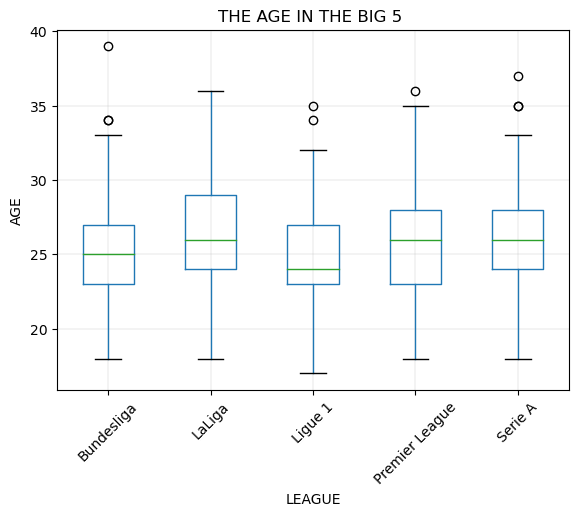

In [86]:
# Setting up of a box diagram
fig, ax = plt.subplots()
selectedChampionship.boxplot(column="age", by="league", ax=ax)

# Set up the graph
plt.title("THE AGE IN THE BIG 5 ")
plt.suptitle('')  # To remove the auto filled title of the box 
plt.xlabel("LEAGUE")
plt.ylabel("AGE")
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.2)

# Display
plt.show()

in average the youngest players play in: 

1.   Bundesliga
2.   Ligue 1
3.   Premier League
4.   Serie A
5.   LaLiga

With these informations, we can not really say if there is a correlation between the age of the players and their market value.




**GOALS IN THE BIG 5**

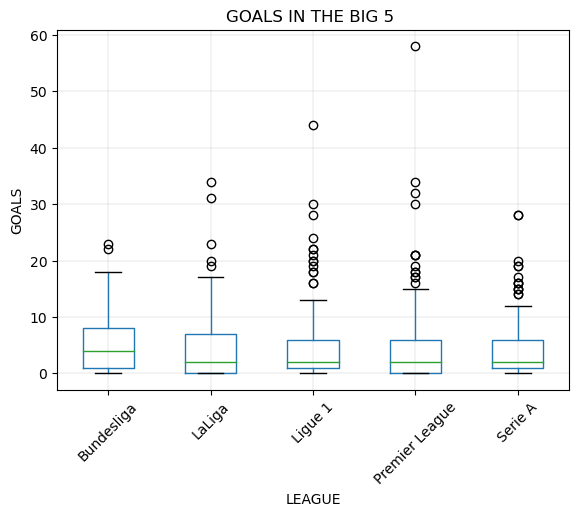

In [87]:
# Setting up of a box diagram
fig, ax = plt.subplots()
selectedChampionship.boxplot(column="goals", by="league", ax=ax)

# Set up the graph
plt.title("GOALS IN THE BIG 5 ")
plt.suptitle('')  # To remove the auto filled title of the box 
plt.xlabel("LEAGUE")
plt.ylabel("GOALS")
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.2)

# Display
plt.show()

Here we can see the number of goals scored in each championship:

1.   Premier League
2.   LaLiga
3.   Bundesliga
4.   Serie A
5.   Ligue 1

We can easier see the link between goals and market value. It seems that the show offered by the players on the pitch impact their market value, so are the attackers the most expensive players ?



**Market value of players in each position**

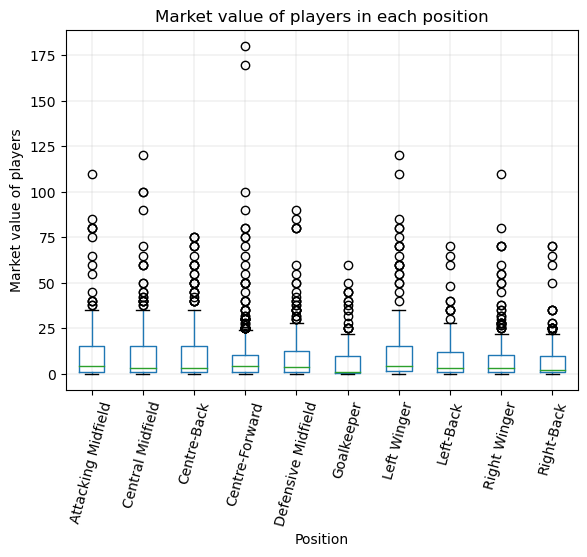

In [88]:
fig, ax = plt.subplots()
data_player.boxplot(column="value_in_millions_of_euros", by="position", ax=ax)

plt.title("Market value of players in each position")
plt.suptitle('')  
plt.xlabel("Position")
plt.ylabel("Market value of players")
plt.xticks(rotation=75)
plt.grid(True, linewidth=0.2)

plt.show()

In average, it seems that the Second Striker and the positions in the Midfield are the most valuable. And the most expensive players play as Centre-Forward.

**TOP 10 MOST EXPENSIVE NATIONALITIES**

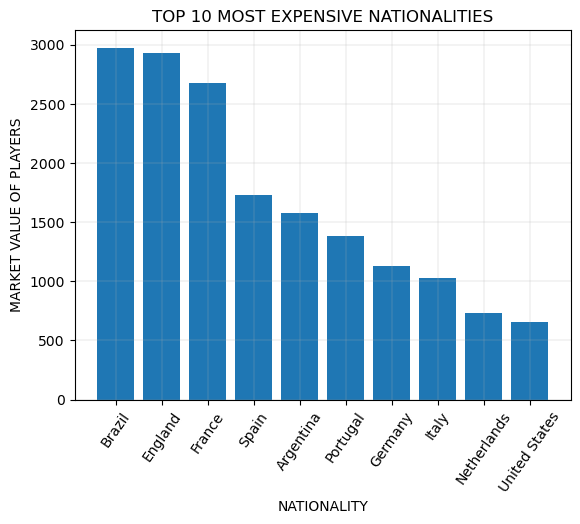

In [90]:
# Compute the total market value for each country
market_value_by_nationality = data_player.groupby("nationality").agg({"value_in_millions_of_euros": "sum"}).reset_index()

# Sorting in the DataFrame to get the 10 most expensive nationalities
top_10_nationalities = market_value_by_nationality.sort_values(by="value_in_millions_of_euros", ascending=False).head(10)

# Set up a bar chart
fig, ax = plt.subplots()
ax.bar(top_10_nationalities["nationality"], top_10_nationalities["value_in_millions_of_euros"])
plt.grid(True, linewidth=0.2)
plt.title("TOP 10 MOST EXPENSIVE NATIONALITIES")
plt.xlabel("NATIONALITY")
plt.ylabel("MARKET VALUE OF PLAYERS")
plt.xticks(rotation=55)

# Display
plt.show()

We cann see where the most talented players in the world come from. Surprisingly, the USA comes at the 10th position, before other big nations of Football like Croatia, Belgium and so on. We can also see the dominance of Europe in term of football as 7 countries out of 10 are European.

**NUMBER OF PLAYERS OF EACH NATIONALITY IN THE BIG 5**

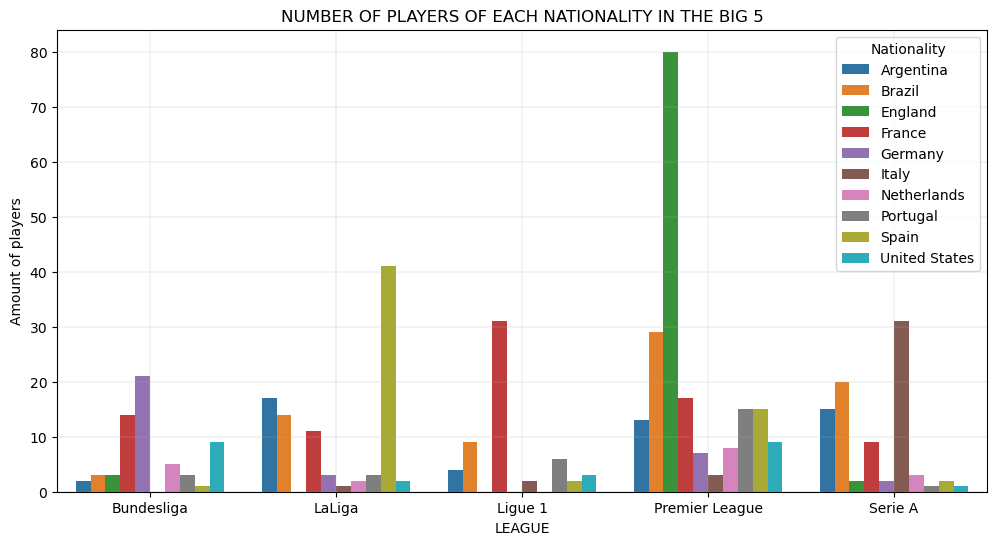

In [91]:
# Utiliser votre variable 'top_10_nationalities' pour filtrer les données
top_nationalities_data = selectedChampionship[selectedChampionship['nationality'].isin(top_10_nationalities['nationality'])]

# Number of players for each nationality in the big 5 
count_by_nationality_championship = top_nationalities_data.groupby(["nationality", "league"]).size().reset_index(name='count')

# Set up a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=count_by_nationality_championship, x="league", y="count", hue="nationality", ci=None)

plt.title("NUMBER OF PLAYERS OF EACH NATIONALITY IN THE BIG 5")
plt.xlabel("LEAGUE")
plt.ylabel("Amount of players")
plt.legend(title="Nationality")
plt.grid(True, linewidth=0.2)

# Display
plt.show()

We can see that the 2 most valuable nationalities play manly in England, which explains the high market value in the Premier League. We can also notice that English players rarely go abroad to do their career.

# 4) UNSUPERVISED LEARNING

In [432]:
data_player = pd.read_csv("TF.csv", index_col=0)

In [433]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram

In [434]:
from sklearn.preprocessing import StandardScaler

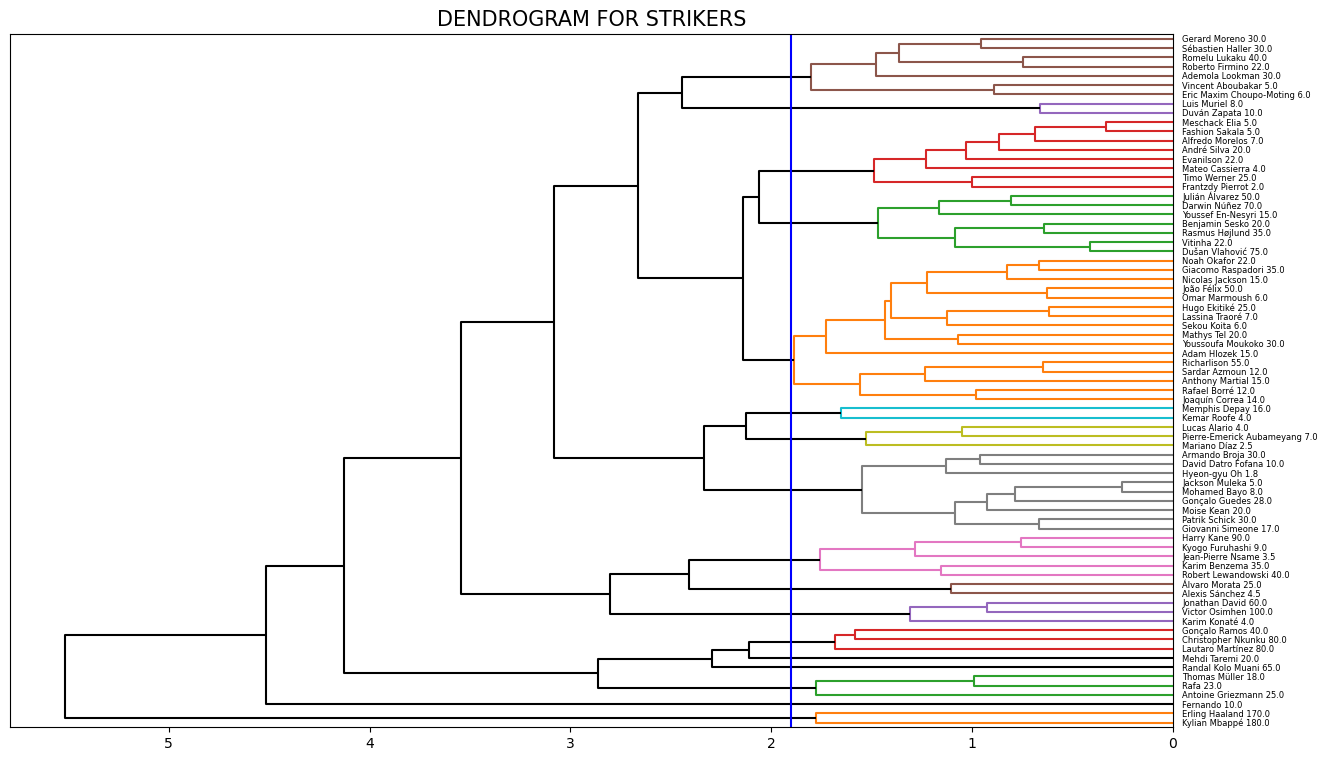

In [435]:
df_hca = data_player.query("position == 'Centre-Forward' and club_was_in_last_2_seasons_in_UCL == 1")[["matches", "goals",
                      "assists", "goals_per_match", "assists_per_match", "age"]]

scaler = StandardScaler()
scaler.fit(df_hca[["matches", "goals", "assists", "goals_per_match", "assists_per_match", "age"]])

hca = pd.concat([pd.DataFrame(scaler.transform(df_hca[list(filter(lambda x: "position" not in x, df_hca.columns))])).reset_index(drop=True), 
          df_hca[list(filter(lambda x: "position" in x, df_hca.columns))].reset_index(drop=True)], axis=1).dropna()
hca.head()

#hca_1 = hca.sample(70, random_state=10)
mergings = linkage(hca, method='average')

# .name.sample(70, random_state=10).tolist(),

# Dendrogram 
threshold = 1.9
plt.figure(figsize=(15,9))
plt.title("DENDROGRAM FOR STRIKERS", size=15)

labels = data_player.query("position == 'Centre-Forward' and club_was_in_last_2_seasons_in_UCL == 1").name + " " + data_player.query("position == 'Centre-Forward' and club_was_in_last_2_seasons_in_UCL == 1").value_in_millions_of_euros.astype("string")
labels = labels.tolist()
dendrogram(mergings, p=5,
           labels=labels,
           leaf_rotation=0, #rotacja_id, które jest na samym dole
           leaf_font_size=6, 
           color_threshold=threshold, #najważniejsza zmienna w kodzie
           above_threshold_color='black',
           orientation='left')
plt.axvline(x = threshold, color = 'blue', label = 'axvline - full height')
plt.show()

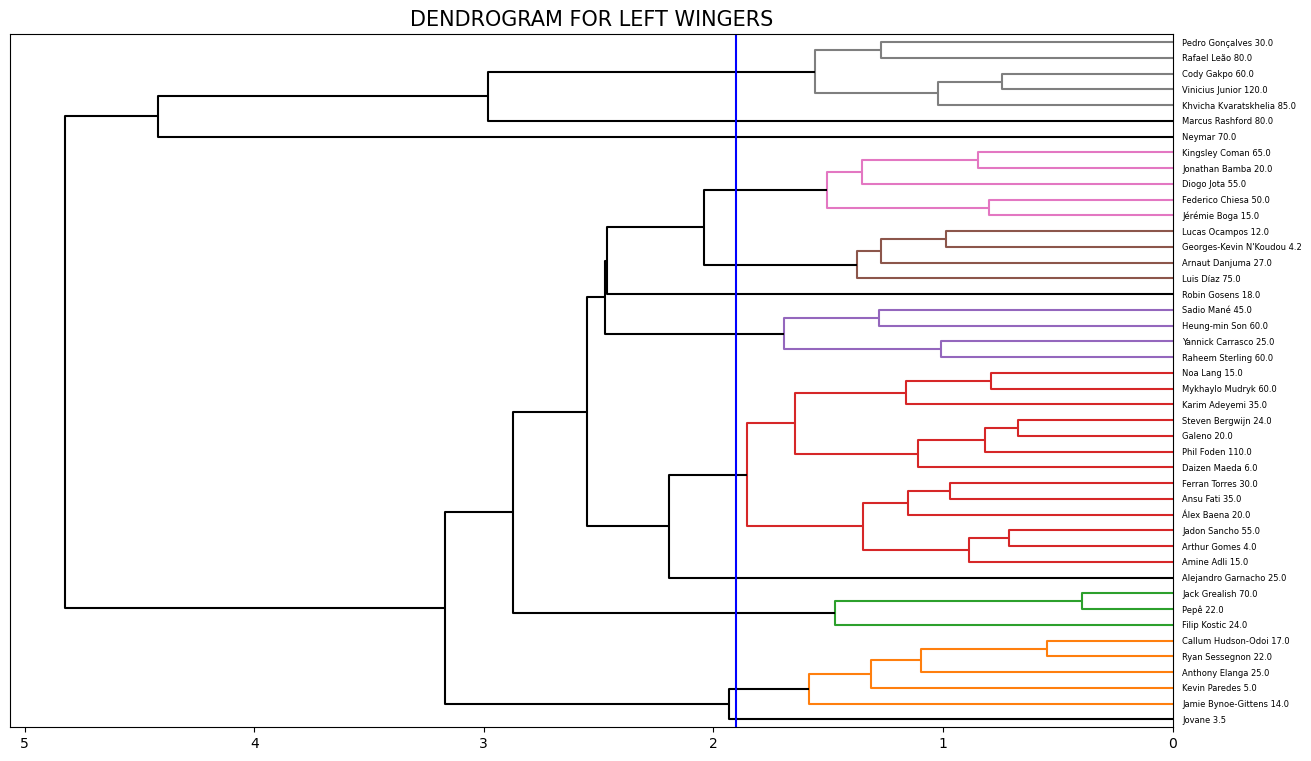

In [436]:
df_hca = data_player.query("position == 'Left Winger' and club_was_in_last_2_seasons_in_UCL == 1")[["matches", "goals",
                      "assists", "goals_per_match", "assists_per_match", "age"]]

scaler = StandardScaler()
scaler.fit(df_hca[["matches", "goals", "assists", "goals_per_match", "assists_per_match", "age"]])

hca = pd.concat([pd.DataFrame(scaler.transform(df_hca[list(filter(lambda x: "position" not in x, df_hca.columns))])).reset_index(drop=True), 
          df_hca[list(filter(lambda x: "position" in x, df_hca.columns))].reset_index(drop=True)], axis=1).dropna()
hca.head()

#hca_1 = hca.sample(70, random_state=10)
mergings = linkage(hca, method='average')

# Dendrogram 
threshold = 1.9
plt.figure(figsize=(15,9))
plt.title("DENDROGRAM FOR LEFT WINGERS", size=15) 

labels = data_player.query("position == 'Left Winger' and club_was_in_last_2_seasons_in_UCL == 1").name + " " + data_player.query("position == 'Left Winger' and club_was_in_last_2_seasons_in_UCL == 1").value_in_millions_of_euros.astype("string")
labels = labels.tolist()
dendrogram(mergings, p=5,
           labels=labels,
           leaf_rotation=0, #rotacja_id, które jest na samym dole
           leaf_font_size=6, 
           color_threshold=threshold, #najważniejsza zmienna w kodzie
           above_threshold_color='black',
           orientation='left')
plt.axvline(x = threshold, color = 'blue', label = 'axvline - full height')
plt.show()

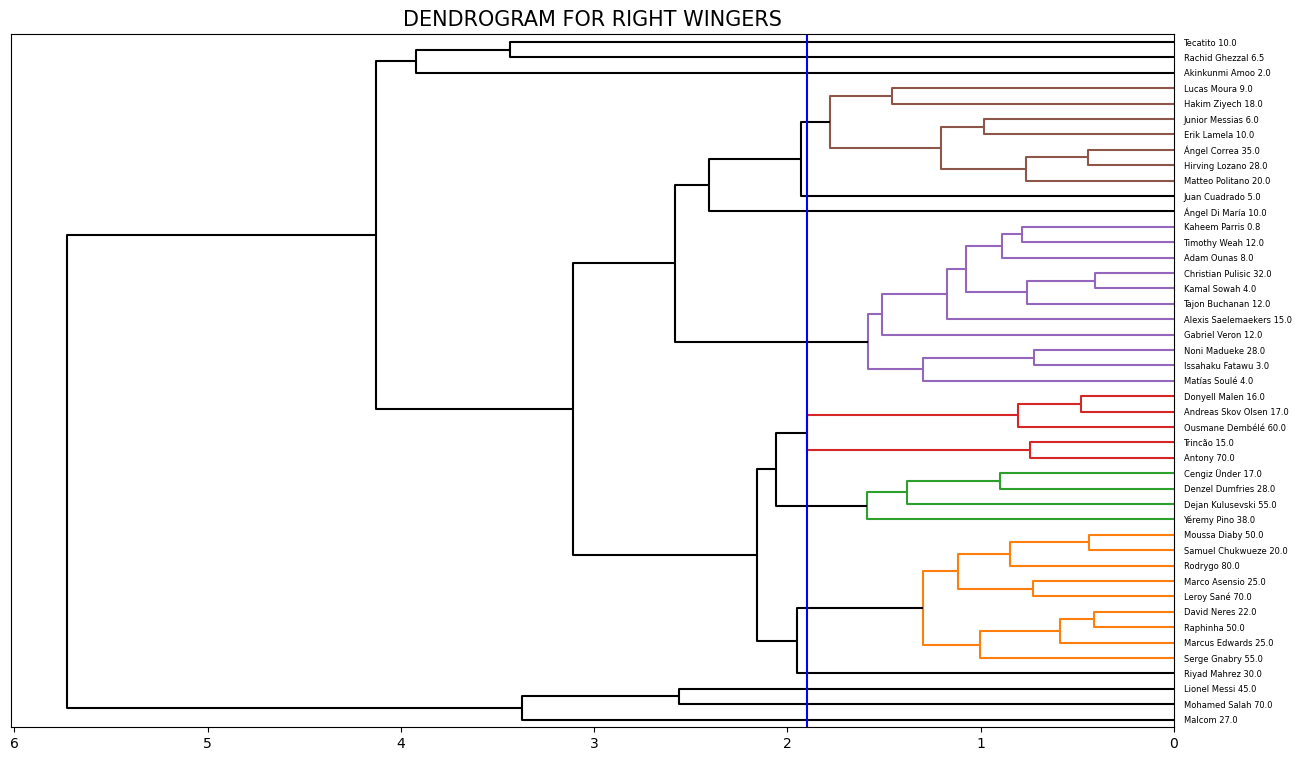

In [437]:
df_hca = data_player.query("position == 'Right Winger' and club_was_in_last_2_seasons_in_UCL == 1")[["matches", "goals",
                      "assists", "goals_per_match", "assists_per_match", "age"]]

scaler = StandardScaler()
scaler.fit(df_hca[["matches", "goals", "assists", "goals_per_match", "assists_per_match", "age"]])

hca = pd.concat([pd.DataFrame(scaler.transform(df_hca[list(filter(lambda x: "position" not in x, df_hca.columns))])).reset_index(drop=True), 
          df_hca[list(filter(lambda x: "position" in x, df_hca.columns))].reset_index(drop=True)], axis=1).dropna()
hca.head()

#hca_1 = hca.sample(70, random_state=10)
mergings = linkage(hca, method='average')

# Dendrogram 
threshold = 1.9
plt.figure(figsize=(15,9))
plt.title("DENDROGRAM FOR RIGHT WINGERS", size=15)

labels = data_player.query("position == 'Right Winger' and club_was_in_last_2_seasons_in_UCL == 1").name + " " + data_player.query("position == 'Right Winger' and club_was_in_last_2_seasons_in_UCL == 1").value_in_millions_of_euros.astype("string")
labels = labels.tolist()
dendrogram(mergings, p=5,
           labels=labels,
           leaf_rotation=0, #rotacja_id, które jest na samym dole
           leaf_font_size=6, 
           color_threshold=threshold, #najważniejsza zmienna w kodzie
           above_threshold_color='black',
           orientation='left')
plt.axvline(x = threshold, color = 'blue', label = 'axvline - full height')
plt.show()

# 5) SUPERVISED LEARNING

In [100]:
df = pd.read_csv("TF.csv", index_col=0)
df = df[df.position.isin(['Left Winger', 'Attacking Midfield', 'Centre-Forward', 'Right Winger'])]

In [101]:
# One-hot encoding
for x in ["nationality", "club", "position", "league", "general_position", "country_association"]:
    for y in df[x].unique():
        df[f"{x}_{y}"] = np.where(df[x] == y, 1,0)
        
df.drop(columns=["nationality", "club", "position", "league", "general_position", "country_association"], inplace=True)

In [102]:
columns_train = list(filter(lambda x: x != "name" and x != "value_in_millions_of_euros", df.columns))

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[columns_train], df[["value_in_millions_of_euros"]], test_size=0.25, random_state=42)

In [104]:
# Firstly it would be good to change the distribution of the target

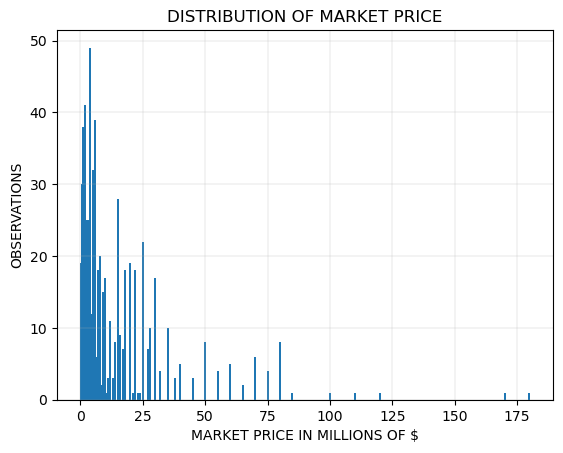

In [105]:
a,b = np.unique(y_train, return_counts=True)
plt.bar(a, b)
plt.title("DISTRIBUTION OF MARKET PRICE")
plt.xlabel("MARKET PRICE IN MILLIONS OF $")
plt.ylabel("OBSERVATIONS")
plt.grid(True, linewidth=0.2);

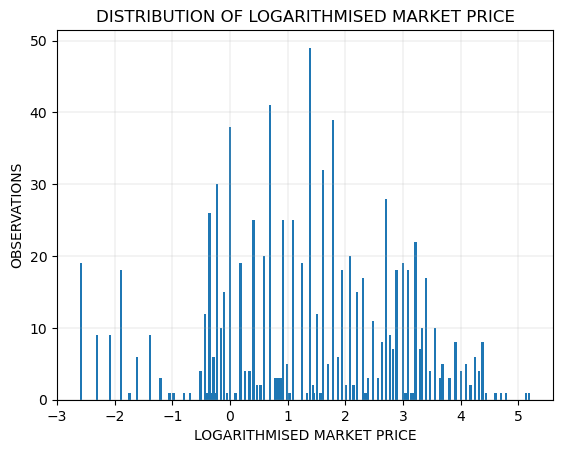

In [106]:
a,b = np.unique(y_train, return_counts=True)
plt.bar(np.log(a), b, width=0.04)
plt.title("DISTRIBUTION OF LOGARITHMISED MARKET PRICE")
plt.xlabel("LOGARITHMISED MARKET PRICE")
plt.ylabel("OBSERVATIONS")
plt.grid(True, linewidth=0.2);

In [107]:
# It is not the ideal distribution of dependent variable but let's see results of models of these two distributions

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

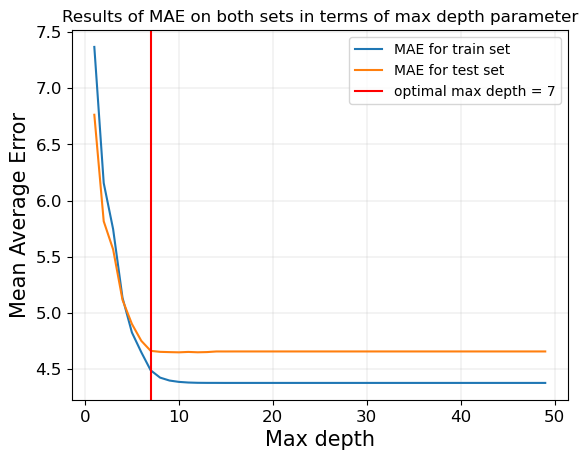

In [126]:
#Model with unchanged distribution

max_depth = list(range(1, 50))
mae_train, mae_test = list(), list()

for x in max_depth:
    model = RandomForestRegressor(n_estimators=20, criterion='squared_error',
                                min_samples_leaf=10,
                                bootstrap=True, n_jobs=-1,random_state=10,
                                ccp_alpha = 0.0, max_depth=x)

    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)

    error_train = mean_absolute_error(y_train, prediction_train)
    error_test = mean_absolute_error(y_test,  prediction_test)

    mae_train.append(error_train)
    mae_test.append(error_test)

plt.plot(max_depth, mae_train)
plt.plot(max_depth, mae_test)
plt.axvline(7, color = "red")
plt.legend(["MAE for train set", "MAE for test set", "optimal max depth = 7"])
plt.xlabel('Max depth', size=15)
plt.ylabel('Mean Average Error', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Results of MAE on both sets in terms of max depth parameter')
plt.grid(True, linewidth=0.2);

In [127]:
max_depth[6]

7

In [128]:
print(f"MAE on train set is equal to {mae_train[6]:.2f}")
print(f"MAE on test  set is equal to {mae_test[6]:.2f}")

MAE on train set is equal to 4.49
MAE on test  set is equal to 4.66


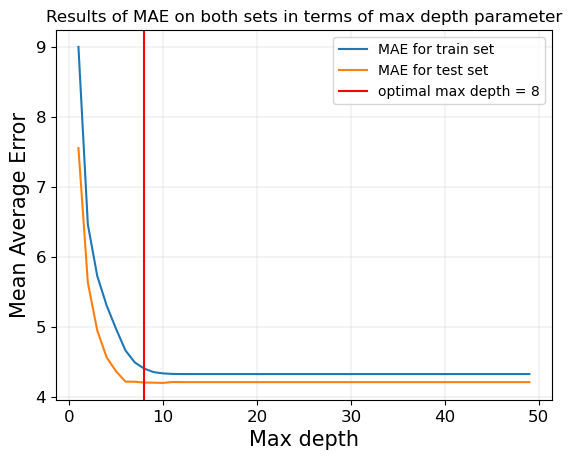

In [129]:
#Model with logarithmised distribution

max_depth = list(range(1, 50))
mae_train, mae_test = list(), list()

for x in max_depth:
    model = RandomForestRegressor(n_estimators=20, criterion='squared_error',
                                min_samples_leaf=10,
                                bootstrap=True, n_jobs=-1,random_state=10,
                                ccp_alpha = 0.0, max_depth=x)

    model.fit(X_train, np.log(y_train))
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)

    error_train = mean_absolute_error(y_train, np.exp(prediction_train))
    error_test = mean_absolute_error(y_test,  np.exp(prediction_test))

    mae_train.append(error_train)
    mae_test.append(error_test)

plt.plot(max_depth, mae_train)
plt.plot(max_depth, mae_test)
plt.axvline(8, color = "red")
plt.legend(["MAE for train set", "MAE for test set", "optimal max depth = 8"])
plt.xlabel('Max depth', size=15)
plt.ylabel('Mean Average Error', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Results of MAE on both sets in terms of max depth parameter')
plt.grid(True, linewidth=0.2);

In [130]:
max_depth[7]

8

In [131]:
print(f"MAE on train set is equal to {mae_train[7]:.2f}")
print(f"MAE on test  set is equal to {mae_test[7]:.2f}")

MAE on train set is equal to 4.41
MAE on test  set is equal to 4.21


In [133]:
# Model with logarithmised distribution gives more exact predictions. MAE on test set is equal to 4.21.